In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)

In [3]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)


In [16]:
def makeDFPlots(dfArray, wRRArray):
    #print wRR_array.shape, df_array.shape
    plt.figure()
    colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628', "red", "yellow", "blue"]
    labels = ["Dimension 1", "Dimension 2", "Dimension 3", "Dimension 4", "Dimension 5", "Dimension 6", "Dimension 7", "Dimension 8", "Dimension 9", "Dimension 10"]
    for i in range(0, wRR_list[0].shape[0]):
        plt.plot(dfArray, wRRArray[:,i], color = colors[i])
        plt.scatter(dfArray, wRRArray[:,i], color = colors[i], s = 8, label=labels[i])
    # df(lambda)
    plt.xlabel(r"df($\lambda$)")
    # and a legend
    plt.legend(loc='lower left')
    plt.show()

In [17]:
def SolveRidgeRegression(X, y):
    wRR_list = []
    df_list = []
    for i in range(0, 5001, 1):
        lam_par = i
        xtranspose = np.transpose(X)
        xtransx = np.dot(xtranspose, X)
        if xtransx.shape[0] != xtransx.shape[1]:
            raise ValueError('Needs to be a square matrix for inverse')
        lamidentity = np.identity(xtransx.shape[0]) * lam_par
        matinv = np.linalg.inv(lamidentity + xtransx)
        xtransy = np.dot(xtranspose, y)
        wRR = np.dot(matinv, xtransy)
        _, S, _ = np.linalg.svd(X)
        df = np.sum(np.square(S) / (np.square(S) + lam_par))
        wRR_list.append(wRR)
        df_list.append(df)
    return wRR_list, df_list

In [18]:
X, y = make_nonlinear()

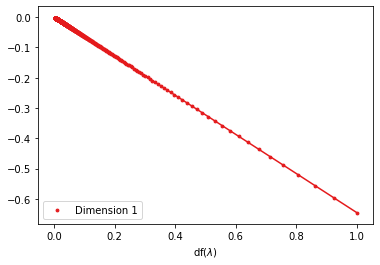

In [19]:
wRR_list, df_list = SolveRidgeRegression(X, y)
wRRArray = np.asarray(wRR_list)
dfArray = np.asarray(df_list)
makeDFPlots(dfArray, wRRArray)

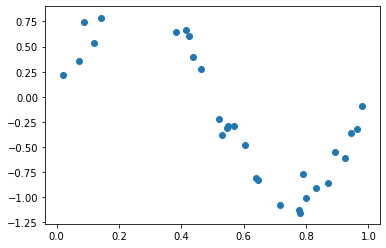

In [20]:
plt.scatter(X,y)
plt.show()

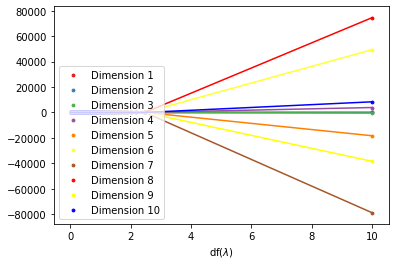

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(9)
new_x = poly.fit(X).transform(X)

wRR_list, df_list = SolveRidgeRegression(new_x, y)
wRRArray = np.asarray(wRR_list)
dfArray = np.asarray(df_list)
makeDFPlots(dfArray, wRRArray)

In [25]:
def plotRMSEValue(max_lamda, RMSE_list, poly):
    colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']
    legend = ["Polynomial Order, p = 1", "Polynomial Order, p = 2", "Polynomial Order, p = 3"]
    plt.plot(range(len(RMSE_list)), RMSE_list, color = colors[poly])
    plt.scatter(range(len(RMSE_list)), RMSE_list, color = colors[poly] , s = 8, label= legend[poly-1])
    # df(lambda)
    plt.xlabel(r"$\lambda$")
    plt.ylabel("RMSE")
    # and a legend
    plt.legend(loc='upper left')
    plt.title(r"RMSE vs $\lambda$ values for the test set, $\lambda$ = 0..%d"%(max_lamda))

In [28]:
def getRMSEValues(X_test, y_test, wRRArray, max_lamda, poly):
    RMSE_list = []
    for lamda in range(0, max_lamda+1):
        wRRvals = wRRArray[lamda]
        y_pred = np.dot(X_test, wRRvals)
        RMSE = np.sqrt(np.sum(np.square(y_test - y_pred))/len(y_test))
        RMSE_list.append(RMSE)
    plotRMSEValue(max_lamda, RMSE_list, poly=poly)

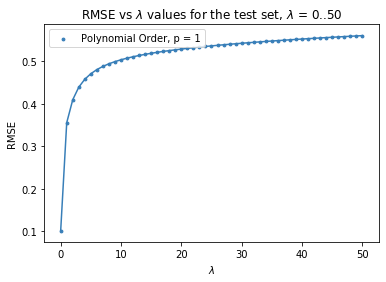

In [29]:
plt.figure()
getRMSEValues(new_x, y, wRRArray, max_lamda=50, poly=1)
plt.show()